In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unrar x /content/drive/MyDrive/CrisisMMD_v2.rar

Streaming output truncated to the last 5000 lines.
Extracting  CrisisMMD_v2.0 (1)/CrisisMMD_v2.0/data_image/hurricane_maria/26_10_2017/923371650397167617_0.jpg      73%  OK 
Extracting  CrisisMMD_v2.0 (1)/CrisisMMD_v2.0/data_image/hurricane_maria/26_10_2017/923383471183052800_0.jpg      73%  OK 
Extracting  CrisisMMD_v2.0 (1)/CrisisMMD_v2.0/data_image/hurricane_maria/26_10_2017/923384274975420416_0.jpg      73%  OK 
Extracting  CrisisMMD_v2.0 (1)/CrisisMMD_v2.0/data_image/hurricane_maria/26_10_2017/923384274975420416_1.jpg      73%  OK 
Extracting  CrisisMMD_v2.0 (1)/CrisisMMD_v2.0/data_image/hurricane_maria/26_10_2017/923388823702265856_0.jpg      73%  OK 
Extracting  CrisisMMD_v2.0 (1)/CrisisMMD_v2.0/data_image/hurricane_maria/26_10_2017/923391790467764224_0.jpg      73%  OK 
Extracting  CrisisMMD_v2.0 (1)/CrisisMMD_v2.0/data_image/hurricane_maria/26_10_2017/923391980427792384_0.jpg      73%  OK 
Extracting  CrisisMMD_v2.

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
nltk.download('stopwords')
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
HurrHarvey_tsv = pd.read_csv('/content/CrisisMMD_v2/CrisisMMD_v2.0/annotations/hurricane_harvey_final_data.tsv', delimiter="\t")
HurrHarvey_tsv

,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path
0,905274232590004225,901671684478029825_0,not_informative,1.0000,informative,1.0000,not_humanitarian,1.0000,infrastructure_and_utility_damage,1.0000,severe_damage,1.0000,"CONGRATS ON HITTING YOIR GOAL GUYS, I'm sure t...",http://pbs.twimg.com/media/DINhGs8XcAE1H7q.jpg,data_image/hurricane_harvey/27_8_2017/90167168...
1,901646074527535105,901646074527535105_0,informative,0.6822,informative,1.0000,injured_or_dead_people,0.6822,infrastructure_and_utility_damage,1.0000,severe_damage,0.6728,RT @ajwamood: #ajwamood : Harvey the first maj...,http://pbs.twimg.com/media/DILxh_xWAAAfJDY.jpg,data_image/hurricane_harvey/27_8_2017/90164607...
2,901646074527535105,901646074527535105_1,informative,0.6822,informative,1.0000,injured_or_dead_people,0.6822,infrastructure_and_utility_damage,1.0000,severe_damage,1.0000,RT @ajwamood: #ajwamood : Harvey the first maj...,http://pbs.twimg.com/media/DILxiisXYAAokz_.jpg,data_image/hurricane_harvey/27_8_2017/90164607...
3,901646074527535105,901646074527535105_2,informative,0.6822,informative,1.0000,injured_or_dead_people,0.6822,infrastructure_and_utility_damage,1.0000,severe_damage,0.6528,RT @ajwamood: #ajwamood : Harvey the first maj...,http://pbs.twimg.com/media/DILxjSUWAAEIaWH.jpg,data_image/hurricane_harvey/27_8_2017/90164607...
4,901646074527535105,901646074527535105_3,informative,0.6822,informative,1.0000,injured_or_dead_people,0.6822,infrastructure_and_utility_damage,1.0000,severe_damage,0.6812,RT @ajwamood: #ajwamood : Harvey the first maj...,http://pbs.twimg.com/media/DILxkWJXgAANF-E.jpg,data_image/hurricane_harvey/27_8_2017/90164607...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429,910263603533664261,910263603533664261_2,informative,0.6519,informative,0.6548,rescue_volunteering_or_donation_effort,0.6519,rescue_volunteering_or_donation_effort,0.6548,NaN,NaN,We delivered our relief efforts to Rockport to...,http://pbs.twimg.com/media/DKHn6lMVAAEikQN.jpg,data_image/hurricane_harvey/19_9_2017/91026360...
4430,910263603533664261,910263603533664261_3,informative,0.6519,not_informative,1.0000,rescue_volunteering_or_donation_effort,0.6519,not_humanitarian,1.0000,NaN,NaN,We delivered our relief efforts to Rockport to...,http://pbs.twimg.com/media/DKHn6lKUIAAV6EA.jpg,data_image/hurricane_harvey/19_9_2017/91026360...
4431,910265204990029824,910265204990029824_0,not_informative,0.8131,not_informative,1.0000,not_humanitarian,0.8131,not_humanitarian,1.0000,NaN,NaN,"Get your parts from the best in the industry, ...",http://pbs.twimg.com/media/DKHpYNDW4AMedw7.jpg,data_image/hurricane_harvey/19_9_2017/91026520...
4432,910268744697397248,910268744697397248_0,informative,1.0000,not_informative,1.0000,rescue_volunteering_or_donation_effort,1.0000,not_humanitarian,1.0000,NaN,NaN,3 hats for #HurricaneHarvey fundraiser. So pre...,http://pbs.twimg.com/media/DKHslo2U8AAxVRz.jpg,data_image/hurricane_harvey/19_9_2017/91026874...


In [ ]:
plot1=HurrHarvey_tsv[['text_info','image_info','text_human','image_human']]
plot1

,text_info,image_info,text_human,image_human
0,not_informative,informative,not_humanitarian,infrastructure_and_utility_damage
1,informative,informative,injured_or_dead_people,infrastructure_and_utility_damage
2,informative,informative,injured_or_dead_people,infrastructure_and_utility_damage
3,informative,informative,injured_or_dead_people,infrastructure_and_utility_damage
4,informative,informative,injured_or_dead_people,infrastructure_and_utility_damage
...,...,...,...,...
4429,informative,informative,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort
4430,informative,not_informative,rescue_volunteering_or_donation_effort,not_humanitarian
4431,not_informative,not_informative,not_humanitarian,not_humanitarian
4432,informative,not_informative,rescue_volunteering_or_donation_effort,not_humanitarian


In [ ]:
HurrHarvey_tsv.columns

Index(['tweet_id', 'image_id', 'text_info', 'text_info_conf', 'image_info',
       'image_info_conf', 'text_human', 'text_human_conf', 'image_human',
       'image_human_conf', 'image_damage', 'image_damage_conf', 'tweet_text',
       'image_url', 'image_path'],
      dtype='object')

In [ ]:
Tweets1=HurrHarvey_tsv[['tweet_id','tweet_text','text_info','text_info_conf','text_human']]
Tweets1

,tweet_id,tweet_text,text_info,text_info_conf,text_human
0,905274232590004225,"CONGRATS ON HITTING YOIR GOAL GUYS, I'm sure t...",not_informative,1.0000,not_humanitarian
1,901646074527535105,RT @ajwamood: #ajwamood : Harvey the first maj...,informative,0.6822,injured_or_dead_people
2,901646074527535105,RT @ajwamood: #ajwamood : Harvey the first maj...,informative,0.6822,injured_or_dead_people
3,901646074527535105,RT @ajwamood: #ajwamood : Harvey the first maj...,informative,0.6822,injured_or_dead_people
4,901646074527535105,RT @ajwamood: #ajwamood : Harvey the first maj...,informative,0.6822,injured_or_dead_people
...,...,...,...,...,...
4429,910263603533664261,We delivered our relief efforts to Rockport to...,informative,0.6519,rescue_volunteering_or_donation_effort
4430,910263603533664261,We delivered our relief efforts to Rockport to...,informative,0.6519,rescue_volunteering_or_donation_effort
4431,910265204990029824,"Get your parts from the best in the industry, ...",not_informative,0.8131,not_humanitarian
4432,910268744697397248,3 hats for #HurricaneHarvey fundraiser. So pre...,informative,1.0000,rescue_volunteering_or_donation_effort


In [ ]:
HurricanIrma_tsv = pd.read_csv('/content/CrisisMMD_v2/CrisisMMD_v2.0/annotations/hurricane_irma_final_data.tsv', delimiter="\t")
HurricanIrma_tsv

,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path
0,905625009430949888,905625009430949888_0,informative,0.6721,informative,1.0000,infrastructure_and_utility_damage,0.6721,infrastructure_and_utility_damage,1.0000,severe_damage,1.0000,RT @MSN: Island of Barbuda 'literally under wa...,http://pbs.twimg.com/media/DJFj_-VVoAA67Ho.jpg,data_image/hurricane_irma/7_9_2017/90562500943...
1,905625016972300289,905625016972300289_0,informative,0.7105,not_informative,0.6726,other_relevant_information,0.7105,not_humanitarian,0.6726,NaN,NaN,RT @Reuters: Hurricane Irma threatens luxury T...,http://pbs.twimg.com/media/DJFsY1LVwAA7PZX.jpg,data_image/hurricane_irma/7_9_2017/90562501697...
2,905625020239683584,905625020239683584_0,informative,1.0000,informative,1.0000,other_relevant_information,1.0000,other_relevant_information,1.0000,NaN,NaN,RT @TheAnonJournal: BREAKING NEWS: Hurricane I...,http://pbs.twimg.com/media/DJAM9rUUQAAi3PJ.jpg,data_image/hurricane_irma/7_9_2017/90562502023...
3,905625059326353409,905625059326353409_0,informative,0.6545,informative,1.0000,other_relevant_information,0.6545,other_relevant_information,1.0000,NaN,NaN,JUST IN: 11PM #Hurricane #Irma update. @ABC7Ne...,http://pbs.twimg.com/media/DJFtMLiXkAAIVbR.jpg,data_image/hurricane_irma/7_9_2017/90562505932...
4,905625064451833856,905625064451833856_0,informative,0.6629,informative,0.6392,infrastructure_and_utility_damage,0.6629,other_relevant_information,0.6392,NaN,NaN,"RT @cnnbrk: Hurricane Irma destroys ""upwards o...",http://pbs.twimg.com/media/DJE4_ehXoAElFGU.jpg,data_image/hurricane_irma/7_9_2017/90562506445...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,910270036861886465,910270036861886465_0,informative,1.0000,informative,1.0000,other_relevant_information,1.0000,infrastructure_and_utility_damage,1.0000,little_or_no_damage,0.3842,Hurricane Irma First Impacts On Nassau Bahamas...,http://pbs.twimg.com/media/DKHtxg8VwAAHash.jpg,data_image/hurricane_irma/19_9_2017/9102700368...
4500,910270462822895617,910270462822895617_0,informative,1.0000,not_informative,0.3779,other_relevant_information,1.0000,not_humanitarian,0.3779,NaN,NaN,Local Resources #Irma https://t.co/CphnkQ6y37,http://pbs.twimg.com/media/DKHuJ7sVYAE4lTs.jpg,data_image/hurricane_irma/19_9_2017/9102704628...
4501,910270554812317697,910270554812317697_0,informative,0.6376,informative,0.6445,other_relevant_information,0.6376,other_relevant_information,0.6445,NaN,NaN,Whoa! Is @Delta about to pull off one more las...,http://pbs.twimg.com/media/DKHuOxWVAAENJpW.jpg,data_image/hurricane_irma/19_9_2017/9102705548...
4502,910270595262291968,910270595262291968_0,not_informative,0.6667,not_informative,1.0000,not_humanitarian,0.6667,not_humanitarian,1.0000,NaN,NaN,New story in Science &amp; Health from Time: h...,http://pbs.twimg.com/media/DKHuSBPWAAIOnti.jpg,data_image/hurricane_irma/19_9_2017/9102705952...


In [ ]:
plot2=HurricanIrma_tsv[['text_info','image_info','text_human','image_human']]
plot2

,text_info,image_info,text_human,image_human
0,informative,informative,infrastructure_and_utility_damage,infrastructure_and_utility_damage
1,informative,not_informative,other_relevant_information,not_humanitarian
2,informative,informative,other_relevant_information,other_relevant_information
3,informative,informative,other_relevant_information,other_relevant_information
4,informative,informative,infrastructure_and_utility_damage,other_relevant_information
...,...,...,...,...
4499,informative,informative,other_relevant_information,infrastructure_and_utility_damage
4500,informative,not_informative,other_relevant_information,not_humanitarian
4501,informative,informative,other_relevant_information,other_relevant_information
4502,not_informative,not_informative,not_humanitarian,not_humanitarian


In [ ]:
Tweets2=HurricanIrma_tsv[['tweet_id','tweet_text','text_info','text_info_conf','text_human']]
Tweets2

,tweet_id,tweet_text,text_info,text_info_conf,text_human
0,905625009430949888,RT @MSN: Island of Barbuda 'literally under wa...,informative,0.6721,infrastructure_and_utility_damage
1,905625016972300289,RT @Reuters: Hurricane Irma threatens luxury T...,informative,0.7105,other_relevant_information
2,905625020239683584,RT @TheAnonJournal: BREAKING NEWS: Hurricane I...,informative,1.0000,other_relevant_information
3,905625059326353409,JUST IN: 11PM #Hurricane #Irma update. @ABC7Ne...,informative,0.6545,other_relevant_information
4,905625064451833856,"RT @cnnbrk: Hurricane Irma destroys ""upwards o...",informative,0.6629,infrastructure_and_utility_damage
...,...,...,...,...,...
4499,910270036861886465,Hurricane Irma First Impacts On Nassau Bahamas...,informative,1.0000,other_relevant_information
4500,910270462822895617,Local Resources #Irma https://t.co/CphnkQ6y37,informative,1.0000,other_relevant_information
4501,910270554812317697,Whoa! Is @Delta about to pull off one more las...,informative,0.6376,other_relevant_information
4502,910270595262291968,New story in Science &amp; Health from Time: h...,not_informative,0.6667,not_humanitarian


In [ ]:
hurrMaria_tsv = pd.read_csv('/content/CrisisMMD_v2/CrisisMMD_v2.0/annotations/hurricane_maria_final_data.tsv', delimiter="\t")
hurrMaria_tsv

,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path
0,922645850203000832,922645850203000832_0,informative,1.0000,not_informative,1.0000,rescue_volunteering_or_donation_effort,1.0000,not_humanitarian,1.0000,dont_know_or_cant_judge,1.0,Puerto Rico Olympic Gold Medalist Monica Puig ...,http://pbs.twimg.com/media/DM3lglIWkAA7lDF.jpg,data_image/hurricane_maria/24_10_2017/92264585...
1,912278084543553537,912278084543553537_0,informative,1.0000,informative,1.0000,other_relevant_information,1.0000,other_relevant_information,1.0000,dont_know_or_cant_judge,1.0,"After a hurricane, there are still dangers, so...",http://pbs.twimg.com/media/DJnLqDiXkAAOM3r.jpg,data_image/hurricane_maria/25_9_2017/912278084...
2,927297465870565376,927297465870565376_0,informative,1.0000,not_informative,1.0000,rescue_volunteering_or_donation_effort,1.0000,not_humanitarian,1.0000,dont_know_or_cant_judge,1.0,Inside @ASPCA Emergency Shelter for ὃEὃE anima...,http://pbs.twimg.com/media/DN4XG2oUQAAnBnJ.jpg,data_image/hurricane_maria/5_11_2017/927297465...
3,921356579261136896,921356579261136896_0,informative,1.0000,informative,1.0000,rescue_volunteering_or_donation_effort,1.0000,infrastructure_and_utility_damage,1.0000,severe_damage,1.0,Postal Service Asks Employees to Volunteer to ...,http://pbs.twimg.com/media/DMk_OdJWkAAVlNo.jpg,data_image/hurricane_maria/20_10_2017/92135657...
4,910523362950053888,910523362950053888_0,informative,0.6757,informative,0.3755,other_relevant_information,0.6757,affected_individuals,0.3755,NaN,NaN,Hurricane Maria hits Puerto Rico after slammin...,http://pbs.twimg.com/media/DKLUKryVoAAbTz5.jpg,data_image/hurricane_maria/20_9_2017/910523362...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4551,929530158209425410,929530158209425410_0,not_informative,0.6650,not_informative,1.0000,not_humanitarian,0.6650,not_humanitarian,1.0000,NaN,NaN,RT @Raefoxann: Puerto Rico you are in our hear...,http://pbs.twimg.com/media/DK8LvPSW0AEG8Z6.jpg,data_image/hurricane_maria/12_11_2017/92953015...
4552,929534542364446721,929534542364446721_0,not_informative,1.0000,not_informative,0.6649,not_humanitarian,1.0000,not_humanitarian,0.6649,NaN,NaN,@realDonaldTrump @ricardorossello EXECUTIVE PO...,http://pbs.twimg.com/media/DOZeh_VUIAEa2Xc.jpg,data_image/hurricane_maria/12_11_2017/92953454...
4553,929538942764011520,929538942764011520_0,not_informative,1.0000,not_informative,1.0000,not_humanitarian,1.0000,not_humanitarian,1.0000,NaN,NaN,@JoyAnnReid 65% of Puerto Rico still without p...,http://pbs.twimg.com/media/DOZifCNV4AAyqg1.jpg,data_image/hurricane_maria/12_11_2017/92953894...
4554,929574229992968193,929574229992968193_0,informative,1.0000,not_informative,1.0000,rescue_volunteering_or_donation_effort,1.0000,not_humanitarian,1.0000,NaN,NaN,Puerto Rico rises with #UMC help ἟5἟7 https://...,http://pbs.twimg.com/media/DOaC1bKXkAISDUN.jpg,data_image/hurricane_maria/12_11_2017/92957422...


In [ ]:
Tweets3=hurrMaria_tsv[['tweet_id','tweet_text','text_info','text_info_conf','text_human']]
Tweets3

,tweet_id,tweet_text,text_info,text_info_conf,text_human
0,922645850203000832,Puerto Rico Olympic Gold Medalist Monica Puig ...,informative,1.0000,rescue_volunteering_or_donation_effort
1,912278084543553537,"After a hurricane, there are still dangers, so...",informative,1.0000,other_relevant_information
2,927297465870565376,Inside @ASPCA Emergency Shelter for ὃEὃE anima...,informative,1.0000,rescue_volunteering_or_donation_effort
3,921356579261136896,Postal Service Asks Employees to Volunteer to ...,informative,1.0000,rescue_volunteering_or_donation_effort
4,910523362950053888,Hurricane Maria hits Puerto Rico after slammin...,informative,0.6757,other_relevant_information
...,...,...,...,...,...
4551,929530158209425410,RT @Raefoxann: Puerto Rico you are in our hear...,not_informative,0.6650,not_humanitarian
4552,929534542364446721,@realDonaldTrump @ricardorossello EXECUTIVE PO...,not_informative,1.0000,not_humanitarian
4553,929538942764011520,@JoyAnnReid 65% of Puerto Rico still without p...,not_informative,1.0000,not_humanitarian
4554,929574229992968193,Puerto Rico rises with #UMC help ἟5἟7 https://...,informative,1.0000,rescue_volunteering_or_donation_effort


In [ ]:
plot3=hurrMaria_tsv[['text_info','image_info','text_human','image_human']]
plot3

,text_info,image_info,text_human,image_human
0,informative,not_informative,rescue_volunteering_or_donation_effort,not_humanitarian
1,informative,informative,other_relevant_information,other_relevant_information
2,informative,not_informative,rescue_volunteering_or_donation_effort,not_humanitarian
3,informative,informative,rescue_volunteering_or_donation_effort,infrastructure_and_utility_damage
4,informative,informative,other_relevant_information,affected_individuals
...,...,...,...,...
4551,not_informative,not_informative,not_humanitarian,not_humanitarian
4552,not_informative,not_informative,not_humanitarian,not_humanitarian
4553,not_informative,not_informative,not_humanitarian,not_humanitarian
4554,informative,not_informative,rescue_volunteering_or_donation_effort,not_humanitarian


In [ ]:
calFire_tsv = pd.read_csv('/content/CrisisMMD_v2/CrisisMMD_v2.0/annotations/california_wildfires_final_data.tsv', delimiter="\t")
calFire_tsv

,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path
0,917791044158185473,917791044158185473_0,informative,1.0000,informative,0.6766,other_relevant_information,1.0000,other_relevant_information,0.6766,NaN,NaN,RT @Gizmodo: Wildfires raging through Northern...,http://pbs.twimg.com/media/DLyi_WYVYAApwNg.jpg,data_image/california_wildfires/10_10_2017/917...
1,917791130590183424,917791130590183424_0,informative,1.0000,informative,0.6667,infrastructure_and_utility_damage,1.0000,affected_individuals,0.6667,NaN,NaN,PHOTOS: Deadly wildfires rage in California ht...,http://pbs.twimg.com/media/DLymKm9UMAAu0qw.jpg,data_image/california_wildfires/10_10_2017/917...
2,917791291823591425,917791291823591425_0,informative,0.6813,informative,1.0000,other_relevant_information,0.6813,infrastructure_and_utility_damage,1.0000,severe_damage,1.0,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,http://pbs.twimg.com/media/DLudaaZV4AAjT7x.jpg,data_image/california_wildfires/10_10_2017/917...
3,917791291823591425,917791291823591425_1,informative,0.6813,not_informative,1.0000,other_relevant_information,0.6813,not_humanitarian,1.0000,NaN,NaN,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,http://pbs.twimg.com/media/DLudaZXUMAABAEZ.jpg,data_image/california_wildfires/10_10_2017/917...
4,917792092100988929,917792092100988929_0,informative,0.6727,informative,0.6612,other_relevant_information,0.6727,infrastructure_and_utility_damage,0.6612,severe_damage,1.0,RT @TIME: California's raging wildfires as you...,http://pbs.twimg.com/media/DLwNe-NXUAE0XCw.jpg,data_image/california_wildfires/10_10_2017/917...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,923761170967797761,923761170967797761_0,informative,0.6495,informative,0.7235,other_relevant_information,0.6495,infrastructure_and_utility_damage,0.7235,severe_damage,1.0,GOP targets environmental rules after Californ...,http://pbs.twimg.com/media/DNF1eNVVQAAlMW7.jpg,data_image/california_wildfires/27_10_2017/923...
1585,923796193670336512,923796193670336512_0,informative,0.3706,not_informative,0.3419,other_relevant_information,0.3706,not_humanitarian,0.3419,NaN,NaN,Motorcycle crash sparked 350-acre fire in Clev...,http://pbs.twimg.com/media/DNH7vWqUMAAHBE8.jpg,data_image/california_wildfires/27_10_2017/923...
1586,923821955568013313,923821955568013313_0,not_informative,0.6634,informative,1.0000,not_humanitarian,0.6634,rescue_volunteering_or_donation_effort,1.0000,NaN,NaN,Carlâ€™s Jr. #SantaRosa catches #Fire while ma...,http://pbs.twimg.com/media/DNITLClXkAETxur.jpg,data_image/california_wildfires/27_10_2017/923...
1587,923844053426348032,923844053426348032_0,informative,0.6763,not_informative,1.0000,other_relevant_information,0.6763,not_humanitarian,1.0000,NaN,NaN,Inside the List: The Romance Writer Who Almost...,http://pbs.twimg.com/media/DNInRG4U8AAsWqd.jpg,data_image/california_wildfires/27_10_2017/923...


In [ ]:
Tweets4=calFire_tsv[['tweet_id','tweet_text','text_info','text_info_conf','text_human']]
Tweets4

,tweet_id,tweet_text,text_info,text_info_conf,text_human
0,917791044158185473,RT @Gizmodo: Wildfires raging through Northern...,informative,1.0000,other_relevant_information
1,917791130590183424,PHOTOS: Deadly wildfires rage in California ht...,informative,1.0000,infrastructure_and_utility_damage
2,917791291823591425,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,informative,0.6813,other_relevant_information
3,917791291823591425,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,informative,0.6813,other_relevant_information
4,917792092100988929,RT @TIME: California's raging wildfires as you...,informative,0.6727,other_relevant_information
...,...,...,...,...,...
1584,923761170967797761,GOP targets environmental rules after Californ...,informative,0.6495,other_relevant_information
1585,923796193670336512,Motorcycle crash sparked 350-acre fire in Clev...,informative,0.3706,other_relevant_information
1586,923821955568013313,Carlâ€™s Jr. #SantaRosa catches #Fire while ma...,not_informative,0.6634,not_humanitarian
1587,923844053426348032,Inside the List: The Romance Writer Who Almost...,informative,0.6763,other_relevant_information


In [ ]:
plot4=calFire_tsv[['text_info','image_info','text_human','image_human']]
plot4

,text_info,image_info,text_human,image_human
0,informative,informative,other_relevant_information,other_relevant_information
1,informative,informative,infrastructure_and_utility_damage,affected_individuals
2,informative,informative,other_relevant_information,infrastructure_and_utility_damage
3,informative,not_informative,other_relevant_information,not_humanitarian
4,informative,informative,other_relevant_information,infrastructure_and_utility_damage
...,...,...,...,...
1584,informative,informative,other_relevant_information,infrastructure_and_utility_damage
1585,informative,not_informative,other_relevant_information,not_humanitarian
1586,not_informative,informative,not_humanitarian,rescue_volunteering_or_donation_effort
1587,informative,not_informative,other_relevant_information,not_humanitarian


In [ ]:
IraqEarthquack_tsv = pd.read_csv('/content/CrisisMMD_v2/CrisisMMD_v2.0/annotations/iraq_iran_earthquake_final_data.tsv', delimiter="\t")
IraqEarthquack_tsv

,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path
0,929989361453621249,929989361453621249_0,informative,1.0000,informative,0.6513,injured_or_dead_people,1.0000,other_relevant_information,0.6513,NaN,NaN,RT @PressTV: UPDATE: Death toll from Iran’s qu...,http://pbs.twimg.com/media/DOfT-eRWkAAJ_kB.jpg,data_image/iraq_iran_earthquake/13_11_2017/929...
1,929989388863508480,929989388863508480_0,not_informative,0.7535,not_informative,1.0000,not_humanitarian,0.7535,not_humanitarian,1.0000,NaN,NaN,RT @CAFOD: We pray for all those affected by t...,http://pbs.twimg.com/media/DOftf6AW0AAzjkE.jpg,data_image/iraq_iran_earthquake/13_11_2017/929...
2,929989414826024960,929989414826024960_0,informative,1.0000,not_informative,1.0000,injured_or_dead_people,1.0000,not_humanitarian,1.0000,NaN,NaN,RT @ReutersWorld: JUST IN: Death toll reaches ...,http://pbs.twimg.com/media/DOf76fBUMAAqpv_.jpg,data_image/iraq_iran_earthquake/13_11_2017/929...
3,929989443913691136,929989443913691136_0,informative,1.0000,informative,0.6031,other_relevant_information,1.0000,injured_or_dead_people,0.6031,NaN,NaN,RT @LaylaAlhussein: A magnitude 7.2 earthquake...,http://pbs.twimg.com/media/DOeoQ75XUAEpZwN.jpg,data_image/iraq_iran_earthquake/13_11_2017/929...
4,929989443913691136,929989443913691136_1,informative,1.0000,informative,1.0000,other_relevant_information,1.0000,rescue_volunteering_or_donation_effort,1.0000,NaN,NaN,RT @LaylaAlhussein: A magnitude 7.2 earthquake...,http://pbs.twimg.com/media/DOeoQ75WAAIsov_.jpg,data_image/iraq_iran_earthquake/13_11_2017/929...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,931880697752567808,931880697752567808_0,informative,0.6322,informative,0.6571,infrastructure_and_utility_damage,0.6322,other_relevant_information,0.6571,NaN,NaN,Damage proxy maps of 5 cities near the epicent...,http://pbs.twimg.com/media/DO60SKAVoAAO2_P.jpg,data_image/iraq_iran_earthquake/18_11_2017/931...
593,931898198569996288,931898198569996288_0,informative,0.6732,informative,0.3536,rescue_volunteering_or_donation_effort,0.6732,infrastructure_and_utility_damage,0.3536,severe_damage,0.6646,#Iran Daily: US Treasury Blocks Donations for ...,http://pbs.twimg.com/media/DO7EdlqWkAAEB-I.jpg,data_image/iraq_iran_earthquake/18_11_2017/931...
594,931925410224529410,931925410224529410_0,informative,1.0000,informative,0.6031,affected_individuals,1.0000,affected_individuals,0.6031,NaN,NaN,#Kurdish children's situation after the #earth...,http://pbs.twimg.com/media/DO7dNwMWAAIQJHW.jpg,data_image/iraq_iran_earthquake/18_11_2017/931...
595,932000082072948736,932000082072948736_0,informative,0.6827,informative,1.0000,other_relevant_information,0.6827,infrastructure_and_utility_damage,1.0000,severe_damage,1.0000,#IRAN'S #EARTHQUAKE EXPOSES #POLITICAL RIFTS A...,http://pbs.twimg.com/media/DO8hHhMWkAAb6UH.jpg,data_image/iraq_iran_earthquake/18_11_2017/932...


In [ ]:
Tweets5=IraqEarthquack_tsv[['tweet_id','tweet_text','text_info','text_info_conf','text_human']]
Tweets5

,tweet_id,tweet_text,text_info,text_info_conf,text_human
0,929989361453621249,RT @PressTV: UPDATE: Death toll from Iran’s qu...,informative,1.0000,injured_or_dead_people
1,929989388863508480,RT @CAFOD: We pray for all those affected by t...,not_informative,0.7535,not_humanitarian
2,929989414826024960,RT @ReutersWorld: JUST IN: Death toll reaches ...,informative,1.0000,injured_or_dead_people
3,929989443913691136,RT @LaylaAlhussein: A magnitude 7.2 earthquake...,informative,1.0000,other_relevant_information
4,929989443913691136,RT @LaylaAlhussein: A magnitude 7.2 earthquake...,informative,1.0000,other_relevant_information
...,...,...,...,...,...
592,931880697752567808,Damage proxy maps of 5 cities near the epicent...,informative,0.6322,infrastructure_and_utility_damage
593,931898198569996288,#Iran Daily: US Treasury Blocks Donations for ...,informative,0.6732,rescue_volunteering_or_donation_effort
594,931925410224529410,#Kurdish children's situation after the #earth...,informative,1.0000,affected_individuals
595,932000082072948736,#IRAN'S #EARTHQUAKE EXPOSES #POLITICAL RIFTS A...,informative,0.6827,other_relevant_information


In [ ]:
plot5=IraqEarthquack_tsv[['text_info','image_info','text_human','image_human']]
plot5

,text_info,image_info,text_human,image_human
0,informative,informative,injured_or_dead_people,other_relevant_information
1,not_informative,not_informative,not_humanitarian,not_humanitarian
2,informative,not_informative,injured_or_dead_people,not_humanitarian
3,informative,informative,other_relevant_information,injured_or_dead_people
4,informative,informative,other_relevant_information,rescue_volunteering_or_donation_effort
...,...,...,...,...
592,informative,informative,infrastructure_and_utility_damage,other_relevant_information
593,informative,informative,rescue_volunteering_or_donation_effort,infrastructure_and_utility_damage
594,informative,informative,affected_individuals,affected_individuals
595,informative,informative,other_relevant_information,infrastructure_and_utility_damage


In [ ]:
MaxiEarthquack_tsv = pd.read_csv('/content/CrisisMMD_v2/CrisisMMD_v2.0/annotations/mexico_earthquake_final_data.tsv', delimiter="\t")
MaxiEarthquack_tsv

,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path
0,910523364154003456,910523364154003456_0,not_informative,1.0000,not_informative,1.0000,not_humanitarian,1.0000,not_humanitarian,1.0000,NaN,NaN,RT @FCBarcelona: Our solidarity with the victi...,http://pbs.twimg.com/media/DKLLdbyW0AASG2R.jpg,data_image/mexico_earthquake/20_9_2017/9105233...
1,910523388598280192,910523388598280192_0,informative,1.0000,informative,0.6720,injured_or_dead_people,1.0000,infrastructure_and_utility_damage,0.6720,dont_know_or_cant_judge,0.4174,Mexico earthquake: Many children killed at pri...,http://pbs.twimg.com/media/DKLUMbJV4AACuFU.jpg,data_image/mexico_earthquake/20_9_2017/9105233...
2,910523397448314882,910523397448314882_0,not_informative,0.6643,not_informative,1.0000,not_humanitarian,0.6643,not_humanitarian,1.0000,NaN,NaN,Obamaâ€™s Response To The Earthquake In #Mexic...,http://pbs.twimg.com/media/DKLUND8WAAAHgON.jpg,data_image/mexico_earthquake/20_9_2017/9105233...
3,910523398144397312,910523398144397312_0,informative,0.9282,informative,1.0000,rescue_volunteering_or_donation_effort,0.9282,rescue_volunteering_or_donation_effort,1.0000,NaN,NaN,RT @AmichaiStein1: #BREAKING: Israel search &a...,http://pbs.twimg.com/media/DKK1CuDWsAAX5Vk.jpg,data_image/mexico_earthquake/20_9_2017/9105233...
4,910523398144397312,910523398144397312_1,informative,0.9282,informative,0.6943,rescue_volunteering_or_donation_effort,0.9282,rescue_volunteering_or_donation_effort,0.6943,NaN,NaN,RT @AmichaiStein1: #BREAKING: Israel search &a...,http://pbs.twimg.com/media/DKK1DyDXkAABvBX.jpg,data_image/mexico_earthquake/20_9_2017/9105233...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,916105333872918528,916105333872918528_0,informative,1.0000,not_informative,1.0000,rescue_volunteering_or_donation_effort,1.0000,not_humanitarian,1.0000,NaN,NaN,Carlos santana donates $100k to mexico earthqu...,http://pbs.twimg.com/media/DLao8g8W4AAKoPV.jpg,data_image/mexico_earthquake/6_10_2017/9161053...
1376,916105374134042624,916105374134042624_0,informative,1.0000,not_informative,0.6412,rescue_volunteering_or_donation_effort,1.0000,not_humanitarian,0.6412,NaN,NaN,Seth troxler donates 10k to earthquake relief ...,http://pbs.twimg.com/media/DLao-2GWsAA97vC.jpg,data_image/mexico_earthquake/6_10_2017/9161053...
1377,916112796194021376,916112796194021376_0,informative,1.0000,informative,0.6337,rescue_volunteering_or_donation_effort,1.0000,other_relevant_information,0.6337,NaN,NaN,Entercom/San Francisco Stations Raise Funds Fo...,http://pbs.twimg.com/media/DLavu1YV4AAgSJ_.jpg,data_image/mexico_earthquake/6_10_2017/9161127...
1378,916164076484653056,916164076484653056_0,informative,0.6580,informative,0.6374,other_relevant_information,0.6580,rescue_volunteering_or_donation_effort,0.6374,NaN,NaN,Mexico Earthquakes | International Medical Cor...,http://pbs.twimg.com/media/DLbeXxlWsAEl9xu.jpg,data_image/mexico_earthquake/6_10_2017/9161640...


In [ ]:
plot6=MaxiEarthquack_tsv[['text_info','image_info','text_human','image_human']]
plot6

,text_info,image_info,text_human,image_human
0,not_informative,not_informative,not_humanitarian,not_humanitarian
1,informative,informative,injured_or_dead_people,infrastructure_and_utility_damage
2,not_informative,not_informative,not_humanitarian,not_humanitarian
3,informative,informative,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort
4,informative,informative,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort
...,...,...,...,...
1375,informative,not_informative,rescue_volunteering_or_donation_effort,not_humanitarian
1376,informative,not_informative,rescue_volunteering_or_donation_effort,not_humanitarian
1377,informative,informative,rescue_volunteering_or_donation_effort,other_relevant_information
1378,informative,informative,other_relevant_information,rescue_volunteering_or_donation_effort


In [ ]:
Tweets6=MaxiEarthquack_tsv[['tweet_id','tweet_text','text_info','text_info_conf','text_human']]
Tweets6

,tweet_id,tweet_text,text_info,text_info_conf,text_human
0,910523364154003456,RT @FCBarcelona: Our solidarity with the victi...,not_informative,1.0000,not_humanitarian
1,910523388598280192,Mexico earthquake: Many children killed at pri...,informative,1.0000,injured_or_dead_people
2,910523397448314882,Obamaâ€™s Response To The Earthquake In #Mexic...,not_informative,0.6643,not_humanitarian
3,910523398144397312,RT @AmichaiStein1: #BREAKING: Israel search &a...,informative,0.9282,rescue_volunteering_or_donation_effort
4,910523398144397312,RT @AmichaiStein1: #BREAKING: Israel search &a...,informative,0.9282,rescue_volunteering_or_donation_effort
...,...,...,...,...,...
1375,916105333872918528,Carlos santana donates $100k to mexico earthqu...,informative,1.0000,rescue_volunteering_or_donation_effort
1376,916105374134042624,Seth troxler donates 10k to earthquake relief ...,informative,1.0000,rescue_volunteering_or_donation_effort
1377,916112796194021376,Entercom/San Francisco Stations Raise Funds Fo...,informative,1.0000,rescue_volunteering_or_donation_effort
1378,916164076484653056,Mexico Earthquakes | International Medical Cor...,informative,0.6580,other_relevant_information


In [ ]:
SiriFlood_tsv = pd.read_csv('/content/CrisisMMD_v2/CrisisMMD_v2.0/annotations/srilanka_floods_final_data.tsv', delimiter="\t")
SiriFlood_tsv

,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path
0,869918891664977921,869918891664977921_0,informative,1.0000,informative,1.0000,rescue_volunteering_or_donation_effort,1.0000,affected_individuals,1.0000,NaN,NaN,RT @irane_Azad: #Iran #News #Us Foreign aid ar...,http://pbs.twimg.com/media/DBJgmLYUwAEcIeb.jpg,data_image/srilanka_floods/31_5_2017/869918891...
1,869950122972635136,869950122972635136_0,informative,1.0000,informative,1.0000,rescue_volunteering_or_donation_effort,1.0000,affected_individuals,1.0000,NaN,NaN,#FloodSL They still need our help #Flood2017 #...,http://pbs.twimg.com/media/DBKtU_fXoAAlVJP.jpg,data_image/srilanka_floods/31_5_2017/869950122...
2,869954009963970560,869954009963970560_0,informative,1.0000,informative,0.6430,injured_or_dead_people,1.0000,affected_individuals,0.6430,NaN,NaN,RT @IndiaToday: Death toll from Sri Lanka's wo...,http://pbs.twimg.com/media/DA7h8mKXsAELpir.jpg,data_image/srilanka_floods/31_5_2017/869954009...
3,869954479524691968,869954479524691968_0,not_informative,0.6816,informative,1.0000,not_humanitarian,0.6816,infrastructure_and_utility_damage,1.0000,severe_damage,1.0000,open our hands for them along with prayer. htt...,http://pbs.twimg.com/media/DBKy7TjUQAAL-rh.jpg,data_image/srilanka_floods/31_5_2017/869954479...
4,869957051547435008,869957051547435008_0,not_informative,0.7502,informative,0.3527,not_humanitarian,0.7502,infrastructure_and_utility_damage,0.3527,severe_damage,0.7606,#FloodSL Response: State vs. Private https://t...,http://pbs.twimg.com/media/DBK1U2fUIAQMjkC.jpg,data_image/srilanka_floods/31_5_2017/869957051...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,881714673157980160,881714673157980160_0,not_informative,1.0000,not_informative,1.0000,not_humanitarian,1.0000,not_humanitarian,1.0000,NaN,NaN,Get to mora and try the whole menu https://t.c...,http://pbs.twimg.com/media/DDx60UAUAAAEGIX.jpg,data_image/srilanka_floods/3_7_2017/8817146731...
1018,881749861871362049,881749861871362049_0,not_informative,1.0000,not_informative,1.0000,not_humanitarian,1.0000,not_humanitarian,1.0000,NaN,NaN,"Mirka Mora (b.1928), noted French-born Austral...",http://pbs.twimg.com/media/DDyavFaWAAEaCuE.jpg,data_image/srilanka_floods/3_7_2017/8817498618...
1019,881770990556131328,881770990556131328_0,not_informative,1.0000,not_informative,1.0000,not_humanitarian,1.0000,not_humanitarian,1.0000,NaN,NaN,"@PaulMalignaggi Lol What u on about, Sergio Mo...",http://pbs.twimg.com/media/DDyuCVoXcAAlfXa.jpg,data_image/srilanka_floods/3_7_2017/8817709905...
1020,881807298930368513,881807298930368513_0,not_informative,0.5056,informative,0.6158,not_humanitarian,0.5056,rescue_volunteering_or_donation_effort,0.6158,NaN,NaN,#Cameroon : 4 #female suicide #Bombers kill 1 ...,http://pbs.twimg.com/media/DDzPED3XgAAynDG.jpg,data_image/srilanka_floods/3_7_2017/8818072989...


In [ ]:
plot7=SiriFlood_tsv[['text_info','image_info','text_human','image_human']]
plot7

,text_info,image_info,text_human,image_human
0,informative,informative,rescue_volunteering_or_donation_effort,affected_individuals
1,informative,informative,rescue_volunteering_or_donation_effort,affected_individuals
2,informative,informative,injured_or_dead_people,affected_individuals
3,not_informative,informative,not_humanitarian,infrastructure_and_utility_damage
4,not_informative,informative,not_humanitarian,infrastructure_and_utility_damage
...,...,...,...,...
1017,not_informative,not_informative,not_humanitarian,not_humanitarian
1018,not_informative,not_informative,not_humanitarian,not_humanitarian
1019,not_informative,not_informative,not_humanitarian,not_humanitarian
1020,not_informative,informative,not_humanitarian,rescue_volunteering_or_donation_effort


In [ ]:
Tweets7=SiriFlood_tsv[['tweet_id','tweet_text','text_info','text_info_conf','text_human']]
Tweets7

,tweet_id,tweet_text,text_info,text_info_conf,text_human
0,869918891664977921,RT @irane_Azad: #Iran #News #Us Foreign aid ar...,informative,1.0000,rescue_volunteering_or_donation_effort
1,869950122972635136,#FloodSL They still need our help #Flood2017 #...,informative,1.0000,rescue_volunteering_or_donation_effort
2,869954009963970560,RT @IndiaToday: Death toll from Sri Lanka's wo...,informative,1.0000,injured_or_dead_people
3,869954479524691968,open our hands for them along with prayer. htt...,not_informative,0.6816,not_humanitarian
4,869957051547435008,#FloodSL Response: State vs. Private https://t...,not_informative,0.7502,not_humanitarian
...,...,...,...,...,...
1017,881714673157980160,Get to mora and try the whole menu https://t.c...,not_informative,1.0000,not_humanitarian
1018,881749861871362049,"Mirka Mora (b.1928), noted French-born Austral...",not_informative,1.0000,not_humanitarian
1019,881770990556131328,"@PaulMalignaggi Lol What u on about, Sergio Mo...",not_informative,1.0000,not_humanitarian
1020,881807298930368513,#Cameroon : 4 #female suicide #Bombers kill 1 ...,not_informative,0.5056,not_humanitarian


In [ ]:
p=pd.concat([plot1,plot2,plot3,plot4,plot5,plot6,plot7])
p

,text_info,image_info,text_human,image_human
0,not_informative,informative,not_humanitarian,infrastructure_and_utility_damage
1,informative,informative,injured_or_dead_people,infrastructure_and_utility_damage
2,informative,informative,injured_or_dead_people,infrastructure_and_utility_damage
3,informative,informative,injured_or_dead_people,infrastructure_and_utility_damage
4,informative,informative,injured_or_dead_people,infrastructure_and_utility_damage
...,...,...,...,...
1017,not_informative,not_informative,not_humanitarian,not_humanitarian
1018,not_informative,not_informative,not_humanitarian,not_humanitarian
1019,not_informative,not_informative,not_humanitarian,not_humanitarian
1020,not_informative,informative,not_humanitarian,rescue_volunteering_or_donation_effort


In [ ]:
p['text_human'].unique()

array(['not_humanitarian', 'injured_or_dead_people',
       'other_relevant_information', 'affected_individuals',
       'infrastructure_and_utility_damage',
       'rescue_volunteering_or_donation_effort', 'vehicle_damage',
       'missing_or_found_people'], dtype=object)

text_info      8708
image_info     8708
text_human     8708
image_human    8708
dtype: int64 text_info      110
image_info     110
text_human     110
image_human    110
dtype: int64 text_info      2529
image_info     2529
text_human     2529
image_human    2529
dtype: int64 text_info      562
image_info     562
text_human     562
image_human    562
dtype: int64 text_info      3624
image_info     3624
text_human     3624
image_human    3624
dtype: int64 text_info      2231
image_info     2231
text_human     2231
image_human    2231
dtype: int64 text_info      304
image_info     304
text_human     304
image_human    304
dtype: int64


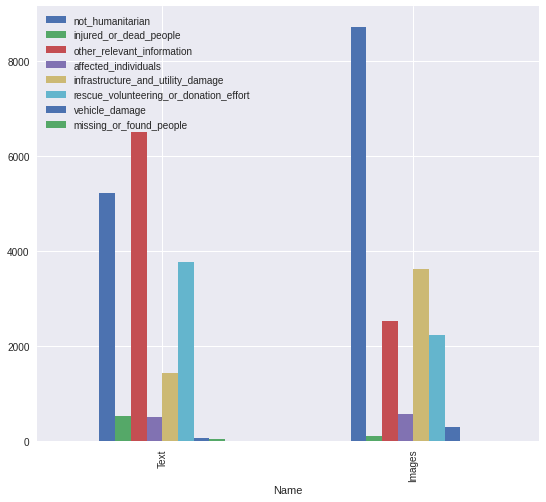

text_info      5227
image_info     5227
text_human     5227
image_human    5227
dtype: int64


In [ ]:
a = p[p.text_human=='not_humanitarian'].count()
b = p[p.text_human=='injured_or_dead_people'].count()
c = p[p.text_human=='other_relevant_information'].count()
d = p[p.text_human=='affected_individuals'].count()
e=p[p.text_human=='infrastructure_and_utility_damage'].count()
f=p[p.text_human=='rescue_volunteering_or_donation_effort'].count()

g=p[p.text_human=='vehicle_damage'].count()
h=p[p.text_human=='missing_or_found_people'].count()
a1 = p[p.image_human=='not_humanitarian'].count()
b1 = p[p.image_human=='injured_or_dead_people'].count()
c1 = p[p.image_human=='other_relevant_information'].count()
d1 = p[p.image_human=='affected_individuals'].count()
e1=p[p.image_human=='infrastructure_and_utility_damage'].count()
f1=p[p.image_human=='rescue_volunteering_or_donation_effort'].count()

g1=p[p.image_human=='vehicle_damage'].count()
h1=p[p.image_human=='missing_or_found_people'].count()
print(a1,b1,c1,d1,e1,f1,g1)
data = [['Text',a[0],b[0],c[0],d[0],e[0],f[0],g[0],h[0]],
        ['Images',a1[0],b1[0],c1[0],d1[0],e1[0],f1[0],g1[0],h1[0]]]

df = pd.DataFrame(data, columns=['Name', 'not_humanitarian', 'injured_or_dead_people',
       'other_relevant_information', 'affected_individuals',
       'infrastructure_and_utility_damage',
       'rescue_volunteering_or_donation_effort', 'vehicle_damage',
       'missing_or_found_people'])
df.plot(x='Name', y=['not_humanitarian', 'injured_or_dead_people',
       'other_relevant_information', 'affected_individuals',
       'infrastructure_and_utility_damage',
       'rescue_volunteering_or_donation_effort', 'vehicle_damage',
       'missing_or_found_people'], kind='bar', figsize=(9,8))
plt.legend(loc='upper left')
plt.show()
print(a)



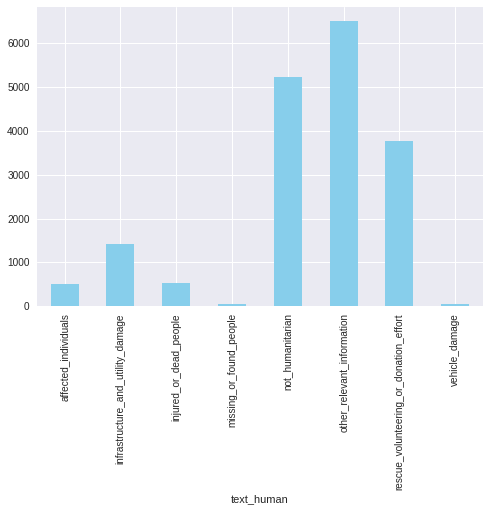

In [ ]:
p.groupby(['text_human']).size().plot.bar(color='skyblue')
p.text_info=='not_informative'].count()

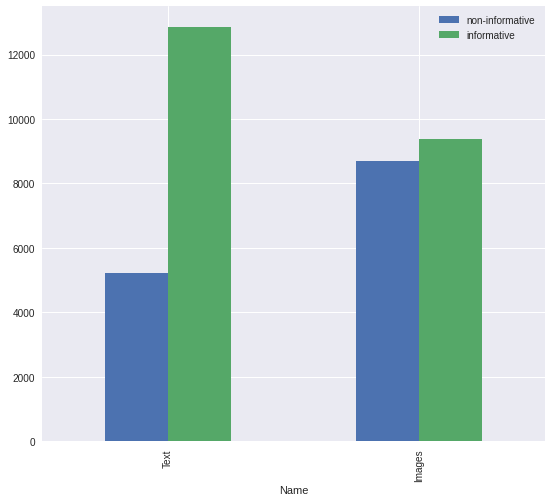

text_info      5227
image_info     5227
text_human     5227
image_human    5227
dtype: int64


In [ ]:

a = p[p.text_info=='not_informative'].count()
b = p[p.text_info=='informative'].count()
a1 = p[p.image_info=='not_informative'].count()
b1 = p[p.image_info=='informative'].count()

data = [['Text',5227, 12855],
        ['Images',8708, 9374]]

df = pd.DataFrame(data, columns=['Name', 'non-informative', 'informative'])
df.plot(x='Name', y=['non-informative', 'informative'], kind='bar', figsize=(9,8))
plt.show()
print(a)

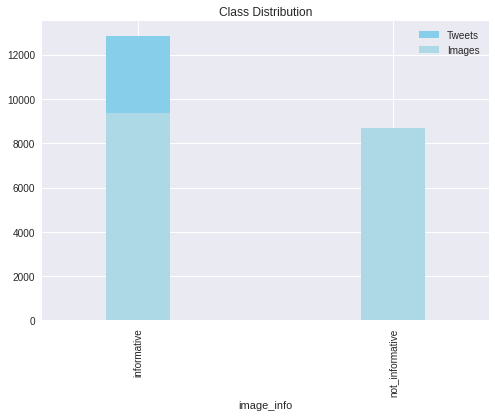

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
r = np.arange(2)
width=0.25
p.groupby(['text_info']).size().plot.bar(r,color='skyblue',width=width,stacked='True',label='Tweets')
p.groupby(['image_info']).size().plot.bar(r+width,color='lightblue',width=width,stacked="True",label="Images")
plt.title("Class Distribution")
plt.legend()

In [ ]:
Tweets=pd.concat([Tweets1,Tweets2,Tweets3,Tweets4,Tweets5,Tweets6,Tweets7])

In [ ]:
Tweets

,tweet_id,tweet_text,text_info,text_info_conf,text_human
0,905274232590004225,"CONGRATS ON HITTING YOIR GOAL GUYS, I'm sure t...",not_informative,1.0000,not_humanitarian
1,901646074527535105,RT @ajwamood: #ajwamood : Harvey the first maj...,informative,0.6822,injured_or_dead_people
2,901646074527535105,RT @ajwamood: #ajwamood : Harvey the first maj...,informative,0.6822,injured_or_dead_people
3,901646074527535105,RT @ajwamood: #ajwamood : Harvey the first maj...,informative,0.6822,injured_or_dead_people
4,901646074527535105,RT @ajwamood: #ajwamood : Harvey the first maj...,informative,0.6822,injured_or_dead_people
...,...,...,...,...,...
1017,881714673157980160,Get to mora and try the whole menu https://t.c...,not_informative,1.0000,not_humanitarian
1018,881749861871362049,"Mirka Mora (b.1928), noted French-born Austral...",not_informative,1.0000,not_humanitarian
1019,881770990556131328,"@PaulMalignaggi Lol What u on about, Sergio Mo...",not_informative,1.0000,not_humanitarian
1020,881807298930368513,#Cameroon : 4 #female suicide #Bombers kill 1 ...,not_informative,0.5056,not_humanitarian


In [ ]:
def cleaner(text):
    cleaned=text.replace("//"," ").replace("."," ")
    cleaned=re.sub(r'[^a-zA-Z]'," ",cleaned)
    cleaned=cleaned.strip() #removing whitespace
    cleaned=cleaned.lower() #converting into lower case words
    cleaned=re.sub(r'\w+\d+'," ",cleaned)#remove alphanumeric words
    cleaned=ps.stem(cleaned) #stemming 
    cleaned=[word for word in cleaned.split() if len(word)>2]
    cleaned=" ".join(cleaned)
    return cleaned
Tweets['Cleantweet_text']=Tweets['tweet_text'].apply(lambda text:cleaner(text))

In [ ]:
Tweets

,tweet_id,tweet_text,text_info,text_info_conf,text_human,Cleantweet_text
0,905274232590004225,"CONGRATS ON HITTING YOIR GOAL GUYS, I'm sure t...",not_informative,1.0000,not_humanitarian,congrats hitting yoir goal guys sure the victi...
1,901646074527535105,RT @ajwamood: #ajwamood : Harvey the first maj...,informative,0.6822,injured_or_dead_people,ajwamood ajwamood harvey the first major hurri...
2,901646074527535105,RT @ajwamood: #ajwamood : Harvey the first maj...,informative,0.6822,injured_or_dead_people,ajwamood ajwamood harvey the first major hurri...
3,901646074527535105,RT @ajwamood: #ajwamood : Harvey the first maj...,informative,0.6822,injured_or_dead_people,ajwamood ajwamood harvey the first major hurri...
4,901646074527535105,RT @ajwamood: #ajwamood : Harvey the first maj...,informative,0.6822,injured_or_dead_people,ajwamood ajwamood harvey the first major hurri...
...,...,...,...,...,...,...
1017,881714673157980160,Get to mora and try the whole menu https://t.c...,not_informative,1.0000,not_humanitarian,get mora and try the whole menu https jhsl
1018,881749861871362049,"Mirka Mora (b.1928), noted French-born Austral...",not_informative,1.0000,not_humanitarian,mirka mora noted french born australian colour...
1019,881770990556131328,"@PaulMalignaggi Lol What u on about, Sergio Mo...",not_informative,1.0000,not_humanitarian,paulmalignaggi lol what about sergio mora didn...
1020,881807298930368513,#Cameroon : 4 #female suicide #Bombers kill 1 ...,not_informative,0.5056,not_humanitarian,cameroon female suicide bombers kill mora http...


In [ ]:
Tweets.to_csv("DisasterSecondDataset.csv")

Text(0.5, 1.0, 'Class Distribution')

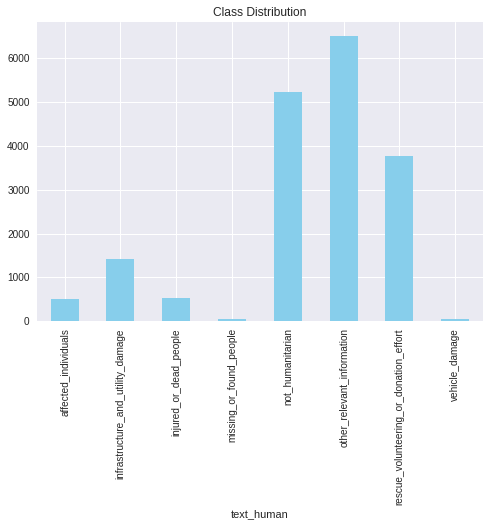

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
Tweets.groupby(['text_human']).size().plot.bar(color='skyblue')
plt.title("Class Distribution")

Text(0.5, 1.0, 'Class Distribution')

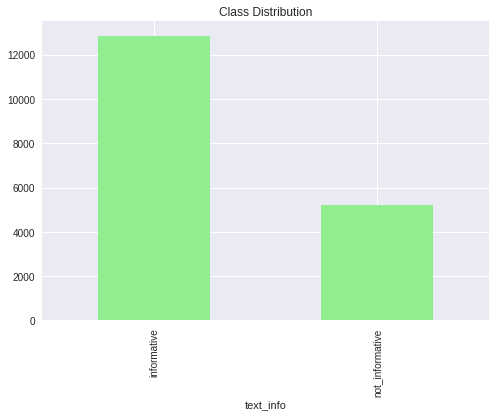

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
Tweets.groupby(['text_info']).size().plot.bar(color='lightgreen')
plt.title("Class Distribution")

In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-cx0710rk
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-cx0710rk
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=705c45970917f38b522ae0cd4bd60091bce97a837db90c44f47fb541cc6a9586
  Stored in directory: /tmp/pip-ephem-wheel-cache-zcyps1ey/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import preprocess_kgptalkie as akhil
from PIL import Image
import numpy as np

In [ ]:
def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 80 # 0 - 360
    s = 100 # 0 - 100
    l = random_state.randint(30, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

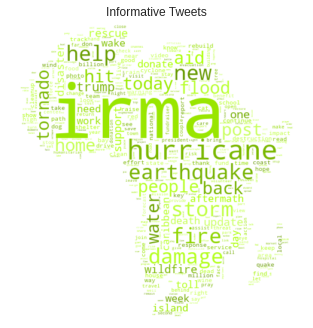

In [ ]:
mask = np.array(Image.open('/content/mask.jpeg'))
dataset=akhil.get_word_freqs(Tweets[Tweets['text_info']=='informative'],'Cleantweet_text')
dataset=" ".join(dataset.index)
wc = WordCloud(stopwords=STOPWORDS,mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0],color_func=similar_color_func)
wc.generate(dataset)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title("Informative Tweets")
plt.show()